In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
cd=pd.read_csv('climate_action_data.csv')

In [3]:
cd.head(913)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
...,...,...,...,...,...,...,...,...,...,...
908,SEN-1090,2025-04-01,18.37,7.03,21.0,47.1,Maize,94.2,8.0,IMG-2090
909,SEN-1201,2025-07-21,15.89,6.4,30.5,33.3,Tomatoes,108.3,14.5,IMG-2201
910,SEN-1309,2025-11-06,28.96,5.04,20.5,47.6,Tomatoes,81.1,12.7,IMG-2309
911,SEN-1339,2025-12-06,16.85,6.57,19.3,34.5,Beans,48.5,12.7,IMG-2339


In [4]:
#more initial specs
cd.info()
cd.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [5]:
cd.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [6]:
cd.shape

(913, 10)

In [7]:
cd.columns

Index(['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
       'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)',
       'Irrigation_Recommended(mm)', 'Drone_Image_ID'],
      dtype='object')

In [9]:
cd = cd.replace('error', float('nan'))

In [10]:
cd =cd.astype({'Soil_Moisture(%)':'float64','Soil_pH':'float64','Temperature(C)':'float64','Humidity(%)':'float64','Fertilizer_Recommended(kg/ha)':'float64','Irrigation_Recommended(mm)':'float64'})

In [11]:
cd.dtypes

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [12]:
cd.head(110)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
...,...,...,...,...,...,...,...,...,...,...
105,SEN-1105,2025-04-16,27.45,7.62,19.8,36.6,Maize,36.1,25.2,IMG-2105
106,SEN-1106,2025-04-17,38.73,7.36,28.9,81.2,Beans,105.2,23.4,IMG-2106
107,SEN-1107,2025-04-18,NaN,NaN,NaN,NaN,Tomatoes,NaN,NaN,IMG-2107
108,SEN-1108,2025-04-19,26.02,5.41,28.5,80.8,Beans,63.6,26.0,IMG-2108


In [38]:
cd.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2026-02-04 07:45:33.834586624,44.790970,6.252997,26.468836,60.107009,87.401877,17.390989
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.955000,5.330000,22.300000,46.100000,57.850000,11.300000
50%,2026-02-03 12:00:00,45.220000,6.295000,26.600000,59.600000,85.900000,17.400000
75%,2026-08-23 18:00:00,62.615000,7.080000,30.600000,75.300000,117.650000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460591,1.021265,4.867592,17.404889,34.805589,7.138402


In [15]:
#checking for empty values
print('Missing values in each existing column')
cd.isnull().sum()

Missing values in each existing column


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [16]:
numeric_cols =['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in cd.columns:
        cd[col]= pd.to_numeric(cd[col], errors='coerce')#converting to numeric,coercing errors to NaN
        cd[col]=cd[col].fillna(cd[col].median())

In [17]:
#For categorical columns, we can fill missing values with the mode
categorical_cols=['Crop_Type'] 
for col in categorical_cols:
    if  col in cd.columns:
        cd[col]=cd[col].fillna(cd[col].mode()[0]) 

In [22]:
print('Missing values after handling:')
print(cd.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [19]:
# Convert 'Date' column to datetime format
cd['Date'] = pd.to_datetime(cd['Date'], errors='coerce')

In [20]:
for col in ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
            'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 
            'Irrigation_Recommended(mm)']:
    cd[col] = pd.to_numeric(cd[col], errors='coerce')

In [ ]:
# Wrong Data Types
soildetail_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
            'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 
            'Irrigation_Recommended(mm)']
for col in soildetail_cols:
    if col in cd.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = cd[col].mean()
       std_dev = cd[col].std()
       cd[col] = cd[col].apply(lambda x: x if (mean - 3 * std_dev < x < mean + 3 * std_dev) else np.nan) 
       
       cd[col] = cd[col].fillna(cd[col].median())
# Check data types after conversion
print("Data types after conversion:")   
print(cd.dtypes)

Data types after conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [52]:
cd =cd.drop_duplicates()
print('num of rows after removing duplicates:' ,cd.shape[0])

num of rows after removing duplicates: 798


In [27]:
print(f"Number of duplicates: {cd.duplicated().sum()}")

cd = cd.drop_duplicates(subset=['Date'], keep='first')
print(f"Duplicate dates: {cd['Date'].duplicated().sum()}")

Number of duplicates: 0
Duplicate dates: 0


In [28]:
#checking again for missing values
print('Missing values after handling:')
print(cd.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [31]:
print(cd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
None


In [30]:
cd.shape

(799, 10)

In [32]:
cd.head(799)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
...,...,...,...,...,...,...,...,...,...,...
796,SEN-1796,2027-03-08,75.25,5.46,20.6,86.5,Beans,133.5,16.1,IMG-2796
797,SEN-1797,2027-03-09,49.56,4.78,18.4,82.6,Tomatoes,58.0,8.4,IMG-2797
798,SEN-1798,2027-03-10,58.77,4.80,29.0,36.2,Tomatoes,113.4,26.6,IMG-2798
799,SEN-1799,2027-03-11,74.57,7.63,28.8,53.6,Maize,105.6,25.4,IMG-2799


Text(0.5, 1.0, 'Soil-PH Distribution')

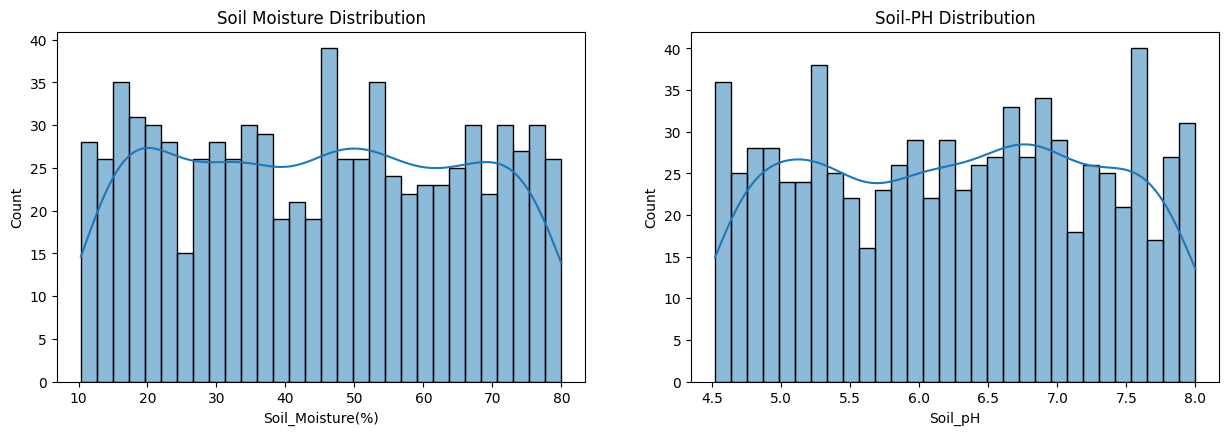

In [34]:
#visualization of numeric variables using histograms
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(cd['Soil_Moisture(%)'],bins=30, kde=True)
plt.title('Soil Moisture Distribution')
#second histogram in same cell of soil moisture
plt.subplot(2,2,2)
sns.histplot(cd['Soil_pH'],bins=30, kde=True)
plt.title('Soil-PH Distribution')

Text(0.5, 1.0, 'Humidity Distribution')

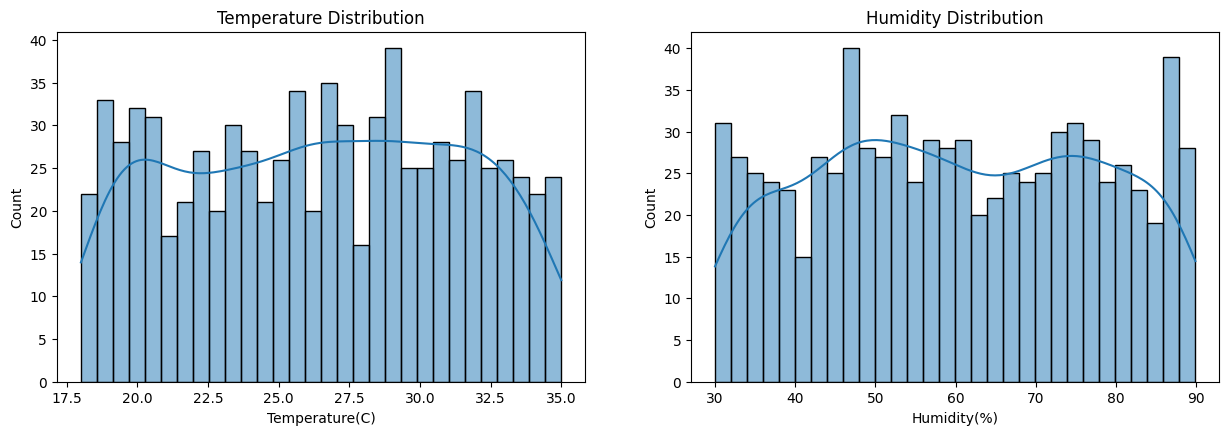

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(cd['Temperature(C)'],bins=30, kde=True)
plt.title('Temperature Distribution')
#second histogram in same cell of temp
plt.subplot(2,2,2)
sns.histplot(cd['Humidity(%)'],bins=30, kde=True)
plt.title('Humidity Distribution')

Text(0.5, 1.0, 'Irrigation Distribution across Crops')

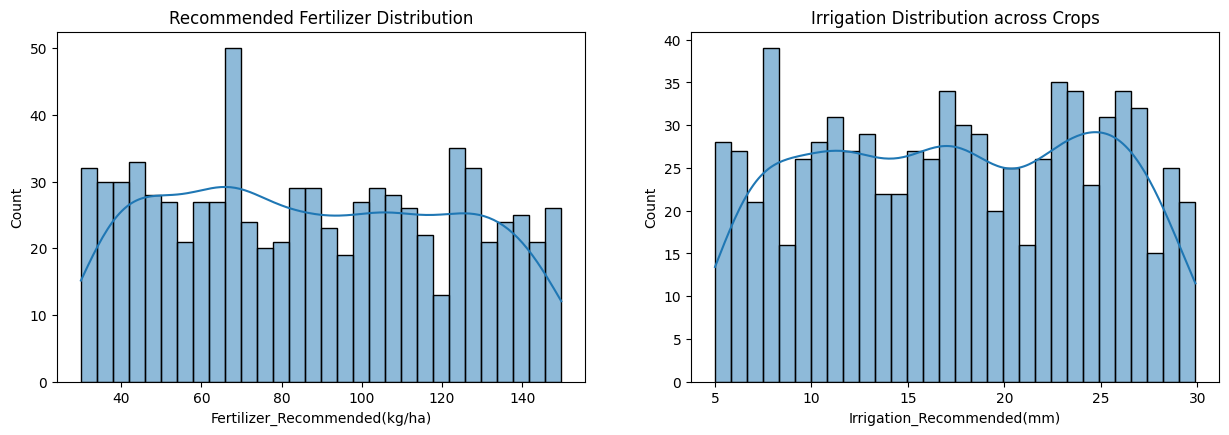

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(cd['Fertilizer_Recommended(kg/ha)'],bins=30, kde=True)
plt.title('Recommended Fertilizer Distribution')
#second histogram in same cell of fertilizer
plt.subplot(2,2,2)
sns.histplot(cd['Irrigation_Recommended(mm)'],bins=30, kde=True)
plt.title('Irrigation Distribution across Crops')

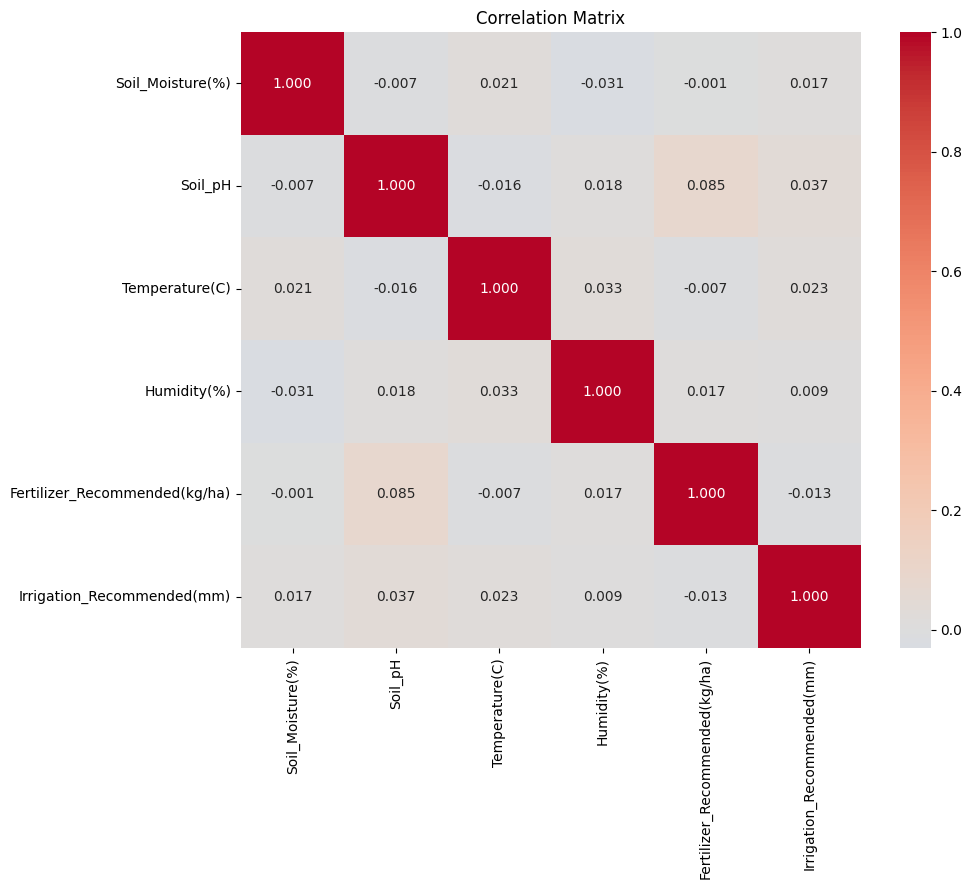

In [40]:
# Correlation Analysis
# Calculate correlations
corr_matrix = cd[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
            'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 
            'Irrigation_Recommended(mm)']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

Average Soil Moisture by Crop Type:
  Crop_Type  Average_Soil_Moisture
0     Wheat              47.356449
1     Maize              44.953581
2     Beans              44.337781
3  Tomatoes              44.015719
4   Lettuce              42.932100

Crop with highest average soil moisture: Wheat (47.36%)


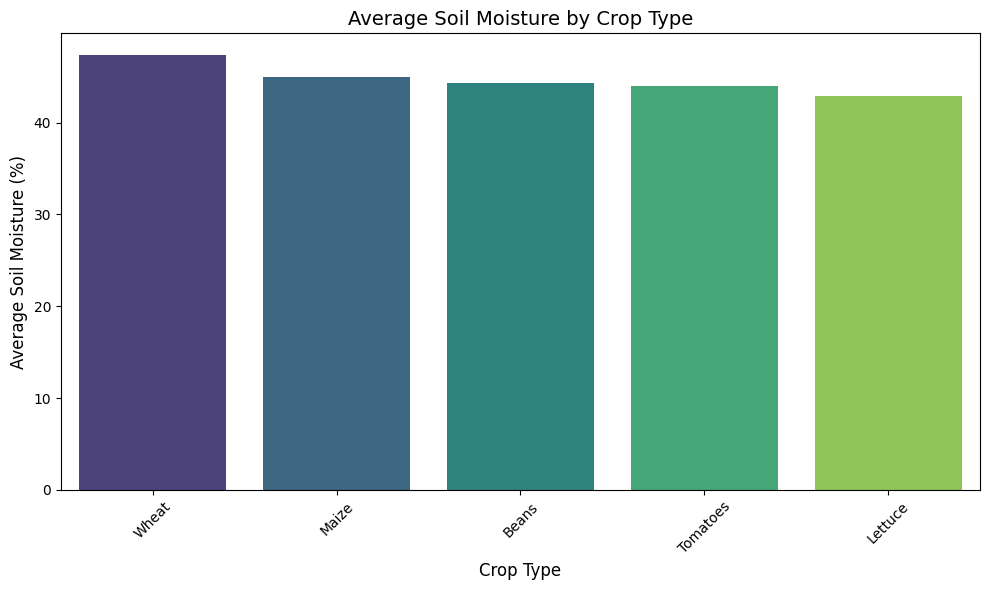

In [ ]:
# Calculate average soil moisture by crop type
crop_moisture = cd.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)

# Converting to a new DataFrame for better visualization
crop_moisture_df = crop_moisture.reset_index()
crop_moisture_df.columns = ['Crop_Type', 'Average_Soil_Moisture']

# Display the result
print("Average Soil Moisture by Crop Type:")
print(crop_moisture_df)

# Find the crop with highest average moisture
highest_moisture_crop = crop_moisture.idxmax()
highest_moisture_value = crop_moisture.max()
print(f"\nCrop with highest average soil moisture: {highest_moisture_crop} ({highest_moisture_value:.2f}%)")

# Visualization using a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=crop_moisture_df, 
            x='Crop_Type', 
            y='Average_Soil_Moisture',
            hue='Crop_Type',
            palette='viridis',
            legend=False)

plt.title('Average Soil Moisture by Crop Type', fontsize=14)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Average Soil Moisture (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Check before filling the empty 449th date record
print("Before filling:")
print(cd.loc[449:451, 'Date'])  # Shows surrounding rows

Before filling:
449          NaT
450   2026-03-27
451   2026-03-28
Name: Date, dtype: datetime64[ns]


In [50]:
# Perform the filling
cd.loc[449, 'Date'] = pd.to_datetime('2026-03-26')

print("\nAfter filling:")
print(cd.loc[449:451, 'Date'])



After filling:
449   2026-03-26
450   2026-03-27
451   2026-03-28
Name: Date, dtype: datetime64[ns]


In [53]:
print(cd.loc[790:798, 'Date'])

790   2027-03-02
791   2027-03-03
792   2027-03-04
793   2027-03-05
794   2027-03-06
795   2027-03-07
796   2027-03-08
797   2027-03-09
798   2027-03-10
Name: Date, dtype: datetime64[ns]


In [46]:
# Key Findings
print("Key Findings:")
print("- After analyzing the correlation heatmap,Fertilizer recommendations are mostly influenced by Soil_PH, Humidity and then Soil Moisture.")
print("- After analysing a bar graph from the grouped crop type dataframe that relates each crop type to its average soil moisture,the crop type with the highest average soil moisture is Wheat!")
#Suggestions
print("Suggestions:")   
print("-Increase the recommended irrigation water used to cater for the quick drying of the added moisture in the soil caused by the high temperatures above 30 degrees ")
print('-Increase the times the crops are irrigated for instance, if irrigation was carried out once a week, make it twice or thrice a week depending on the growth of the crops in response to the high temperatures.')
print('-Get data from the soil moisture sensors to determine which crops have a poor retention of water so as to increase the irrigation frequency for such crops.')
print('-Irrigate more in the early morning hours for example 5AM where the water loss in the soil is way less than during the day.')

Key Findings:
- After analyzing the correlation heatmap,Fertilizer recommendations are mostly influenced by Soil_PH, Humidity and then Soil Moisture.
- After analysing a bar graph from the grouped crop type dataframe that relates each crop type to its average soil moisture,the crop type with the highest average soil moisture is Wheat!
Suggestions:
-Increase the recommended irrigation water used to cater for the quick drying of the added moisture in the soil caused by the high temperatures above 30 degrees 
-Increase the times the crops are irrigated for instance, if irrigation was carried out once a week, make it twice or thrice a week depending on the growth of the crops in response to the high temperatures.
-Get data from the soil moisture sensors to determine which crops have a poor retention of water so as to increase the irrigation frequency for such crops.
-Irrigate more in the early morning hours for example 5AM where the water loss in the soil is way less than during the day.


In [54]:
cd.to_csv(
    'cleaned_precision_agriculture_data.csv',
    index=False,
    encoding='utf-8-sig',  # Better Excel compatibility
    date_format='%Y-%m-%d',  # Format dates consistently
    float_format='%.2f'  # Round numbers to 2 decimal places
)